MNIST Handwritten Digit Classification using Deep Learning(Neural Networks)
==============================

Importing Dependencies

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST dataset from keras dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
#shape of the data
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images
Testing data = 10,000 images

1. Image dimensions = 28x28x1
2. gray scale images - channel = 1

In [5]:
#printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


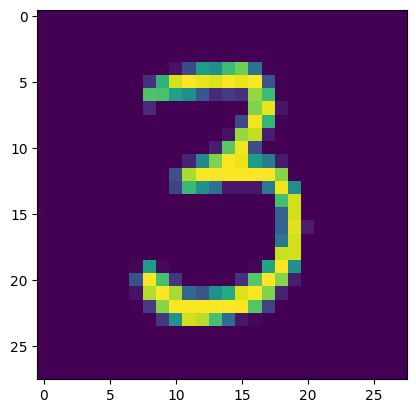

3


In [7]:
#displaying the 10th image
plt.imshow(X_train[50])
plt.show()

#print the corresponding label
print(Y_train[50])

Image Labels

In [8]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [9]:
#unique labels in Y_train
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
#unique labels in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


All the Value have same dimension in this dataset, if not, we have to resize the image to the same dimension.

In [11]:
#scaling the data
X_train = X_train/255
X_test = X_test/255

In [12]:
#printing the scaled data
print(X_train[10])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [13]:
#setting up the layers of the Neural Network
model = keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')
])

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
#compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
model.fit(X_train, Y_train, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 983us/step - accuracy: 0.8532 - loss: 0.5308
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9536 - loss: 0.1580
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - accuracy: 0.9669 - loss: 0.1133
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.9733 - loss: 0.0877
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.9778 - loss: 0.0708
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - accuracy: 0.9824 - loss: 0.0589
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - accuracy: 0.9849 - loss: 0.0501
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.9868 - loss: 0.0429
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 939us/step - accuracy: 0.9886 - loss: 0.0373
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9907 - loss: 0.0324


Training data accuracy = 98.97%

In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9654 - loss: 0.1291
Accuracy: 96.94


Test data accuracy = 96.61 %

In [17]:
print(X_test.shape)

(10000, 28, 28)


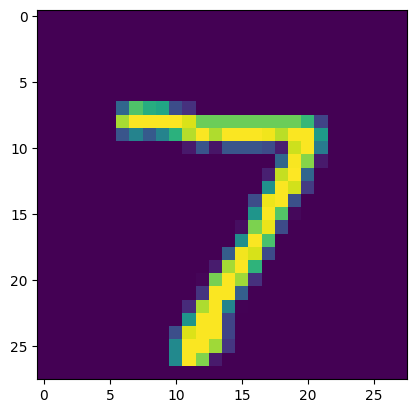

In [18]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [19]:
print(Y_test[0])

7


In [20]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step


In [21]:
print(Y_pred.shape)

(10000, 10)


In [22]:
print(Y_pred[0])

[2.8942027e-12 1.5622723e-10 6.8796766e-08 1.3004814e-04 4.1429835e-14
 3.4594820e-09 6.3040808e-21 9.9986863e-01 2.7382381e-08 1.2393315e-06]


model.predict() gives the prediction probability of each class for dataset

In [23]:
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [24]:
Y_pred_Labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_Labels)


[7, 2, 1, 0, 4, 1, 4, 9, 8, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 8, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 3, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test = True Labels
Y_pred = Predicted Labels

Confusion Matrix
================

In [25]:
conf_mat = confusion_matrix(Y_test,Y_pred_Labels)

In [26]:
print(conf_mat)

tf.Tensor(
[[ 948    0    0    3    3    2    8    0    4   12]
 [   1 1119    0    2    0    0    4    1    8    0]
 [   3    3  973   25    2    0    5   10   11    0]
 [   0    0    2  993    0    3    1    3    5    3]
 [   0    1    1    1  958    0    6    2    5    8]
 [   1    1    0   19    3  850    3    0   11    4]
 [   1    2    0    1    4    5  940    1    4    0]
 [   0    3    7    5    3    0    1  999    6    4]
 [   0    0    1   11    5    2    4    3  942    6]
 [   0    2    0    3   18    5    1    3    5  972]], shape=(10, 10), dtype=int32)


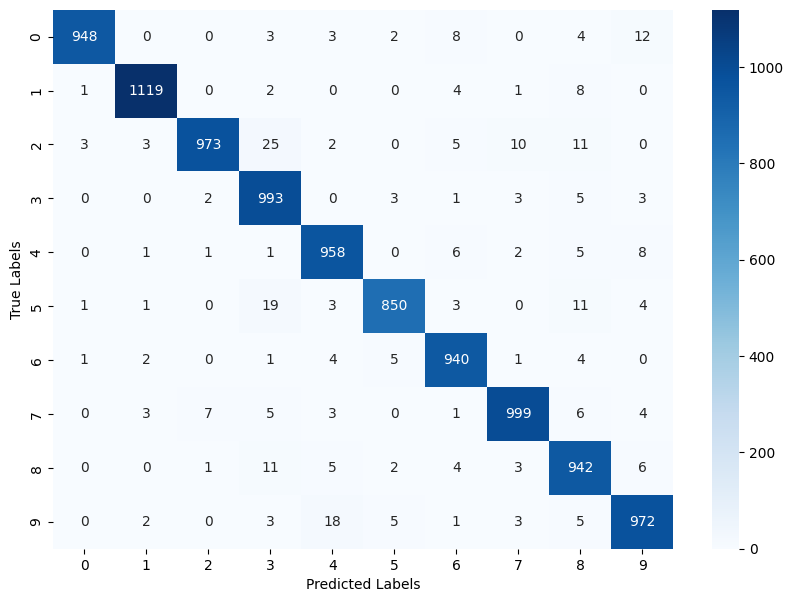

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Building a Predictive Model

In [42]:
input_image_path = input("Enter the path of the image: ")

input_image = cv2.imread(input_image_path)

grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

resized_image = cv2.resize(grayscale_image, (28,28))

resized_image = resized_image/255

image_reshaped = resized_image.reshape(1,28,28)

image_pred = model.predict(image_reshaped)

label_for_image = np.argmax(image_pred)

print('The Handwritten Digit is:',label_for_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The Handwritten Digit is: 5
